In [1]:
#imoport necessary libraries required 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualization
%matplotlib inline
import seaborn as sns #for visualization
import sklearn as sk #for visualization
from sklearn.linear_model import LogisticRegression #model building

In [2]:
#get current working directory
import os
os.getcwd()

'C:\\Users\\fpalash\\Desktop\\R_and_Kaggle\\Python\\PRACTICE\\ML\\Logistic\\CUSTOMER_CHURN'

In [37]:
#import data from above directory
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col = 0)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
#getting all the column names
list(df)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [38]:
#List unique values for all the column, wherever we get only Yes/No we will map it to 1/0
print(df.Partner.unique())
print(df.Dependents.unique())
print(df.OnlineSecurity.unique())
print(df.OnlineBackup.unique())
print(df.DeviceProtection.unique())
print(df.TechSupport.unique())
print(df.StreamingTV.unique())
print(df.StreamingMovies.unique())
print(df.PaperlessBilling.unique())
print(df.Churn.unique())
print(df.gender.unique())
print(df.PhoneService.unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No']
['No' 'Yes']
['Female' 'Male']
['No' 'Yes']


In [39]:
#converting all categorical variable with 2 distinct values to  numerical one.
# If distinct values are less we can just map the values as given below
#Create a function that converts all values of df['variable'] into numbers
def cat_to_numeric(X):
    if X == 'Yes':
        return 1
    if X == 'No':
        return 0
    if X == 'Male':
        return 1
    if X == 'Female':
        return 0

#Apply the function to the score variable
df['Partner'] = df['Partner'].apply(cat_to_numeric)
df['Dependents'] = df['Dependents'].apply(cat_to_numeric)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(cat_to_numeric)
df['Churn'] = df['Churn'].apply(cat_to_numeric)
df['gender'] = df['gender'].apply(cat_to_numeric)
df['PhoneService'] = df['PhoneService'].apply(cat_to_numeric)


In [40]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [41]:
#let's check the distinct values again
#List unique values for all the column, wherever we get only Yes/No we will map it to 1/0
print(df.Partner.unique())
print(df.Dependents.unique())
print(df.OnlineSecurity.unique())
print(df.OnlineBackup.unique())
print(df.DeviceProtection.unique())
print(df.TechSupport.unique())
print(df.StreamingTV.unique())
print(df.StreamingMovies.unique())
print(df.PaperlessBilling.unique())
print(df.Churn.unique())
print(df.gender.unique())
print(df.PhoneService.unique())

[1 0]
[0 1]
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
[1 0]
[0 1]
[0 1]
[0 1]


In [43]:
#create numerical variable using dummy variable function
df2 = pd.get_dummies(df,columns=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])

In [45]:
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,Month-to-month,1,...,0,1,0,0,1,0,0,1,0,0
5575-GNVDE,1,0,0,0,34,1,No,DSL,One year,0,...,1,1,0,0,1,0,0,1,0,0
3668-QPYBK,1,0,0,0,2,1,No,DSL,Month-to-month,1,...,0,1,0,0,1,0,0,1,0,0
7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,One year,0,...,1,0,0,1,1,0,0,1,0,0
9237-HQITU,0,0,0,0,2,1,No,Fiber optic,Month-to-month,1,...,0,1,0,0,1,0,0,1,0,0


In [46]:
list(df2)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes']

In [58]:
# let's check whether all the no internet service columns are same or not.
# In my opinion it should be same
df2.loc[:,['OnlineSecurity_No internet service', 'OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service']]
#df1.iloc[1:5, 2:4]

,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,StreamingTV_No internet service,StreamingMovies_No internet service
customerID,,,,,,
7590-VHVEG,0,0,0,0,0,0
5575-GNVDE,0,0,0,0,0,0
3668-QPYBK,0,0,0,0,0,0
7795-CFOCW,0,0,0,0,0,0
9237-HQITU,0,0,0,0,0,0
9305-CDSKC,0,0,0,0,0,0
1452-KIOVK,0,0,0,0,0,0
6713-OKOMC,0,0,0,0,0,0
7892-POOKP,0,0,0,0,0,0


In [88]:
# as all the column are same we can replace all this columns by single column 1/0
#dropping all the columns except one
#deleting along the column using axis attribute
df2.drop('StreamingTV_No internet service', axis=1)
df2.drop('TechSupport_No internet service', axis=1, inplace=True)
df2.drop('DeviceProtection_No internet service', axis=1, inplace=True)
df2.drop('OnlineSecurity_No internet service', axis=1, inplace=True)

KeyError: "labels ['StreamingTV_No internet service'] not contained in axis"

In [89]:
#renaming remaining column to indicate internet service taken
df2.rename(columns={'StreamingMovies_No internet service':'internet_service_availed'},inplace=True)

df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,...,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,internet_service_availed,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,Month-to-month,1,...,1,1,0,1,0,1,0,1,0,0
5575-GNVDE,1,0,0,0,34,1,No,DSL,One year,0,...,0,0,1,1,0,1,0,1,0,0
3668-QPYBK,1,0,0,0,2,1,No,DSL,Month-to-month,1,...,1,1,0,1,0,1,0,1,0,0
7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,One year,0,...,0,0,1,0,1,1,0,1,0,0
9237-HQITU,0,0,0,0,2,1,No,Fiber optic,Month-to-month,1,...,0,1,0,1,0,1,0,1,0,0


In [90]:
list(df2)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'internet_service_availed',
 'StreamingMovies_Yes']

In [91]:
#let use our old function to change the value of internet service availed
def cat_to_numeric(X):
    if X == 1:
        return 0
    if X == 0:
        return 1
df2['internet_service_availed'] = df2['internet_service_availed'].apply(cat_to_numeric)    

In [92]:
#dropping some more unwanted columns
df2 = df2.drop(['OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'], axis=1)
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,...,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,internet_service_availed,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,Month-to-month,1,...,29.85,29.85,0,0,1,0,0,0,1,0
5575-GNVDE,1,0,0,0,34,1,No,DSL,One year,0,...,56.95,1889.5,0,1,0,1,0,0,1,0
3668-QPYBK,1,0,0,0,2,1,No,DSL,Month-to-month,1,...,53.85,108.15,1,1,1,0,0,0,1,0
7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,One year,0,...,42.30,1840.75,0,1,0,1,1,0,1,0
9237-HQITU,0,0,0,0,2,1,No,Fiber optic,Month-to-month,1,...,70.70,151.65,1,0,0,0,0,0,1,0


In [93]:
#List unique values for remaining categorical columns
print(df.MultipleLines.unique())
print(df.InternetService.unique())
print(df.Contract.unique())

['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['Month-to-month' 'One year' 'Two year']


In [94]:
#let's convert remaining categorical values to numerical variable
#create numerical variable using dummy variable function
df3 = pd.get_dummies(df2,columns=['MultipleLines','InternetService','Contract'])
df3.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,StreamingMovies_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,Electronic check,29.85,29.85,...,0,0,1,0,1,0,0,1,0,0
5575-GNVDE,1,0,0,0,34,1,0,Mailed check,56.95,1889.5,...,0,1,0,0,1,0,0,0,1,0
3668-QPYBK,1,0,0,0,2,1,1,Mailed check,53.85,108.15,...,0,1,0,0,1,0,0,1,0,0
7795-CFOCW,1,0,0,0,45,0,0,Bank transfer (automatic),42.30,1840.75,...,0,0,1,0,1,0,0,0,1,0
9237-HQITU,0,0,0,0,2,1,1,Electronic check,70.70,151.65,...,0,1,0,0,0,1,0,1,0,0


In [95]:
#contract variable is perfect, we will handle other two variables
#dropping some more unwanted columns
df3 = df3.drop(['InternetService_No','MultipleLines_No'], axis=1)
df3.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,StreamingTV_Yes,internet_service_availed,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,Electronic check,29.85,29.85,...,0,1,0,1,0,1,0,1,0,0
5575-GNVDE,1,0,0,0,34,1,0,Mailed check,56.95,1889.5,...,0,1,0,0,0,1,0,0,1,0
3668-QPYBK,1,0,0,0,2,1,1,Mailed check,53.85,108.15,...,0,1,0,0,0,1,0,1,0,0
7795-CFOCW,1,0,0,0,45,0,0,Bank transfer (automatic),42.30,1840.75,...,0,1,0,1,0,1,0,0,1,0
9237-HQITU,0,0,0,0,2,1,1,Electronic check,70.70,151.65,...,0,1,0,0,0,0,1,1,0,0


In [97]:
#renaming remaining column to indicate internet service taken
df3.rename(columns={'MultipleLines_No phone service':'phone_service_availed'},inplace=True)
def cat_to_numeric(X):
    if X == 1:
        return 0
    if X == 0:
        return 1
df3['phone_service_availed'] = df3['phone_service_availed'].apply(cat_to_numeric)  
df3.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,StreamingTV_Yes,internet_service_availed,StreamingMovies_Yes,phone_service_availed,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,Electronic check,29.85,29.85,...,0,1,0,0,0,1,0,1,0,0
5575-GNVDE,1,0,0,0,34,1,0,Mailed check,56.95,1889.5,...,0,1,0,1,0,1,0,0,1,0
3668-QPYBK,1,0,0,0,2,1,1,Mailed check,53.85,108.15,...,0,1,0,1,0,1,0,1,0,0
7795-CFOCW,1,0,0,0,45,0,0,Bank transfer (automatic),42.30,1840.75,...,0,1,0,0,0,1,0,0,1,0
9237-HQITU,0,0,0,0,2,1,1,Electronic check,70.70,151.65,...,0,1,0,1,0,0,1,1,0,0


In [98]:
#we have got two columns for phone service so removing one of those
df3 = df3.drop(['phone_service_availed'], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 24 columns):
gender                         7043 non-null int64
SeniorCitizen                  7043 non-null int64
Partner                        7043 non-null int64
Dependents                     7043 non-null int64
tenure                         7043 non-null int64
PhoneService                   7043 non-null int64
PaperlessBilling               7043 non-null int64
PaymentMethod                  7043 non-null object
MonthlyCharges                 7043 non-null float64
TotalCharges                   7043 non-null object
Churn                          7043 non-null int64
OnlineSecurity_Yes             7043 non-null uint8
OnlineBackup_Yes               7043 non-null uint8
DeviceProtection_Yes           7043 non-null uint8
TechSupport_Yes                7043 non-null uint8
StreamingTV_Yes                7043 non-null uint8
internet_service_availed       7043 non-null int64
StreamingMov

In [99]:
df3.rename(columns={'gender':'is_male'},inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 24 columns):
is_male                        7043 non-null int64
SeniorCitizen                  7043 non-null int64
Partner                        7043 non-null int64
Dependents                     7043 non-null int64
tenure                         7043 non-null int64
PhoneService                   7043 non-null int64
PaperlessBilling               7043 non-null int64
PaymentMethod                  7043 non-null object
MonthlyCharges                 7043 non-null float64
TotalCharges                   7043 non-null object
Churn                          7043 non-null int64
OnlineSecurity_Yes             7043 non-null uint8
OnlineBackup_Yes               7043 non-null uint8
DeviceProtection_Yes           7043 non-null uint8
TechSupport_Yes                7043 non-null uint8
StreamingTV_Yes                7043 non-null uint8
internet_service_availed       7043 non-null int64
StreamingMov

In [104]:
df3.PaymentMethod.unique()                  

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [105]:
#let's convert these variables too to numeric
df3 = pd.get_dummies(df3,columns=['PaymentMethod'])
df3.head(5)

,is_male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,1,0,0,0,0,1,0
5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,1,0,0,1,0,0,0,0,1
3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,1,0,0,0,0,0,1
7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,1,0,0,1,0,1,0,0,0
9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,1,1,0,0,0,0,1,0


In [106]:
#converted all the payment method to numerical type
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 27 columns):
is_male                                    7043 non-null int64
SeniorCitizen                              7043 non-null int64
Partner                                    7043 non-null int64
Dependents                                 7043 non-null int64
tenure                                     7043 non-null int64
PhoneService                               7043 non-null int64
PaperlessBilling                           7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7043 non-null object
Churn                                      7043 non-null int64
OnlineSecurity_Yes                         7043 non-null uint8
OnlineBackup_Yes                           7043 non-null uint8
DeviceProtection_Yes                       7043 non-null uint8
TechSupport_Yes                            7043 non-null uint

In [107]:
#the only issue now is totalcharges as it is object format, we need to change it
df3['TotalCharges'] = pd.to_numeric(df3['TotalCharges'],errors='coerce') 

In [109]:
#checking our final df
dff = df3
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 27 columns):
is_male                                    7043 non-null int64
SeniorCitizen                              7043 non-null int64
Partner                                    7043 non-null int64
Dependents                                 7043 non-null int64
tenure                                     7043 non-null int64
PhoneService                               7043 non-null int64
PaperlessBilling                           7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7032 non-null float64
Churn                                      7043 non-null int64
OnlineSecurity_Yes                         7043 non-null uint8
OnlineBackup_Yes                           7043 non-null uint8
DeviceProtection_Yes                       7043 non-null uint8
TechSupport_Yes                            7043 non-null uin

In [112]:
#checking missing value is the df as a percenage of total rows
#dff.isnull().sum()
dff.isnull().sum()/dff.shape[0]

is_male                                    0.000000
SeniorCitizen                              0.000000
Partner                                    0.000000
Dependents                                 0.000000
tenure                                     0.000000
PhoneService                               0.000000
PaperlessBilling                           0.000000
MonthlyCharges                             0.000000
TotalCharges                               0.001562
Churn                                      0.000000
OnlineSecurity_Yes                         0.000000
OnlineBackup_Yes                           0.000000
DeviceProtection_Yes                       0.000000
TechSupport_Yes                            0.000000
StreamingTV_Yes                            0.000000
internet_service_availed                   0.000000
StreamingMovies_Yes                        0.000000
MultipleLines_Yes                          0.000000
InternetService_DSL                        0.000000
InternetServ

In [113]:
#let's replace missing values in total charges with mode as percentage is very less
for column in ['TotalCharges']:
    dff[column].fillna(dff[column].mode()[0], inplace=True)
dff.isnull().sum()/dff.shape[0]
#now we have got zero missing values

is_male                                    0.0
SeniorCitizen                              0.0
Partner                                    0.0
Dependents                                 0.0
tenure                                     0.0
PhoneService                               0.0
PaperlessBilling                           0.0
MonthlyCharges                             0.0
TotalCharges                               0.0
Churn                                      0.0
OnlineSecurity_Yes                         0.0
OnlineBackup_Yes                           0.0
DeviceProtection_Yes                       0.0
TechSupport_Yes                            0.0
StreamingTV_Yes                            0.0
internet_service_availed                   0.0
StreamingMovies_Yes                        0.0
MultipleLines_Yes                          0.0
InternetService_DSL                        0.0
InternetService_Fiber optic                0.0
Contract_Month-to-month                    0.0
Contract_One 

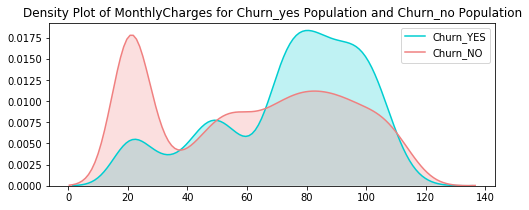

In [123]:
#let the EDA begin
#pair plot to see many variables at a time
plt.figure(figsize=(8,3)) #width followed by height
sns.kdeplot(dff['MonthlyCharges'][dff.Churn== 1], color= 'darkturquoise', shade=True)
sns.kdeplot(dff['MonthlyCharges'][dff.Churn == 0], color= 'lightcoral', shade=True)

plt.legend(['Churn_YES', 'Churn_NO'])
plt.title('Density Plot of MonthlyCharges for Churn_yes Population and Churn_no Population')
plt.show()
#this shows that customers with high monthly charges have high chances of churn

In [126]:
list(dff)

['is_male',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'internet_service_availed',
 'StreamingMovies_Yes',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

C:\Users\fpalash\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\fpalash\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


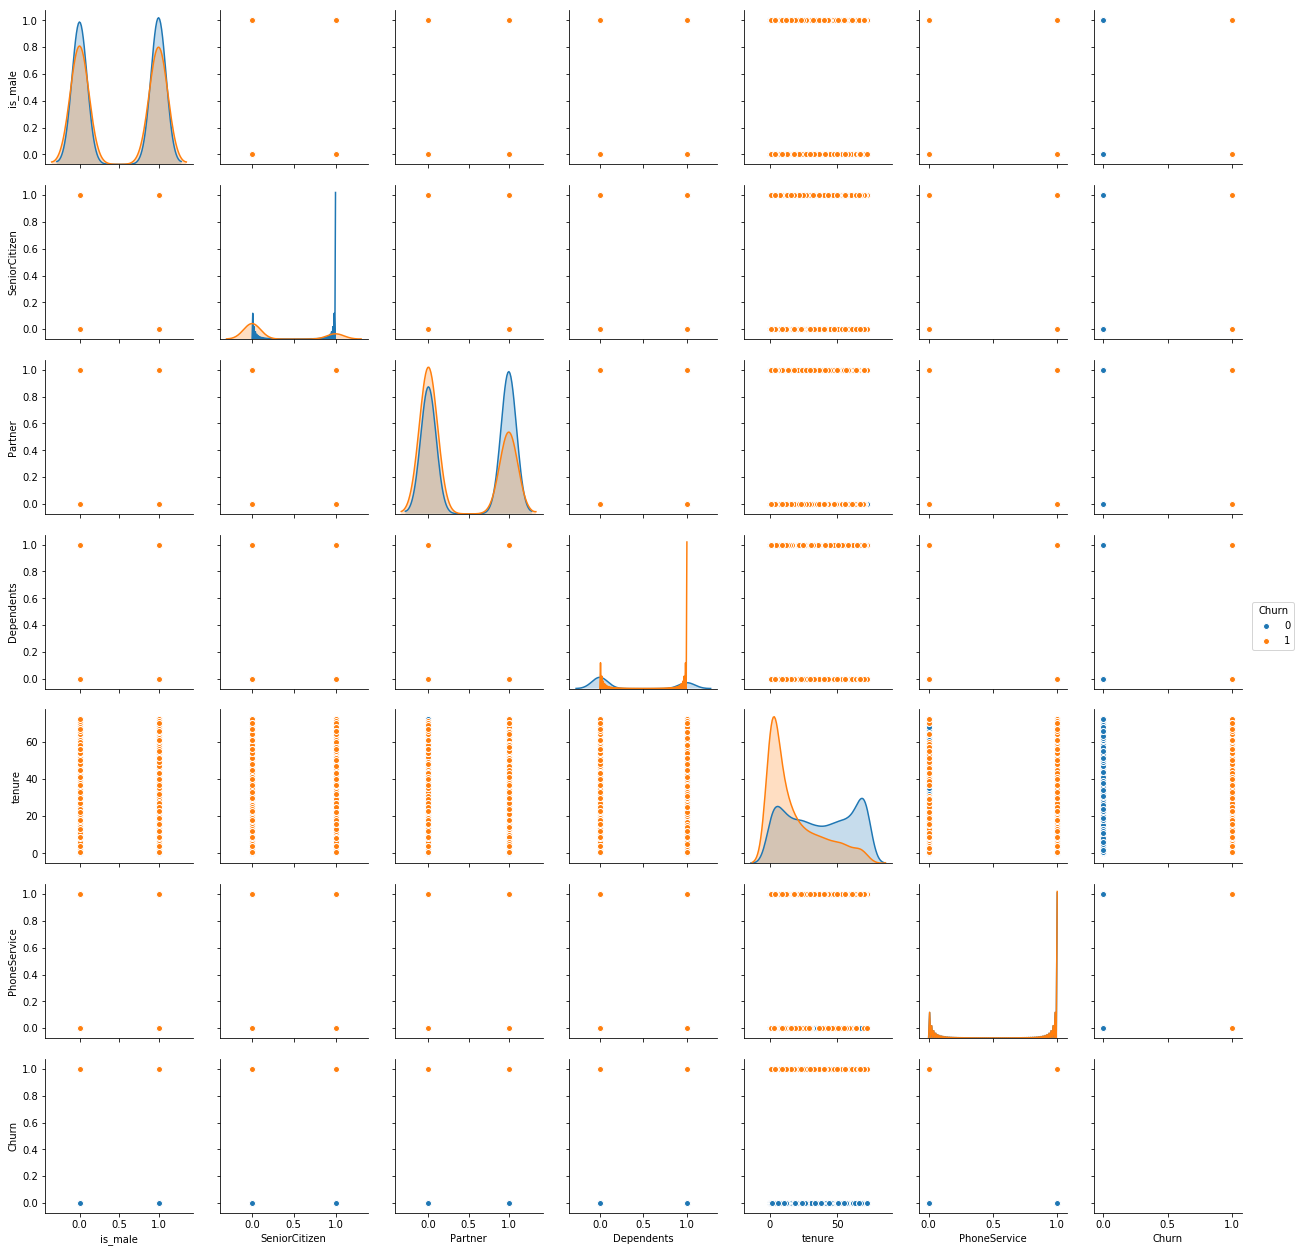

In [138]:
sns.pairplot(dff[['is_male',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService','Churn']], hue='Churn',diag_kind="kde", diag_kws=dict(shade=True))

In [ ]:
# Observe the diagonals to draw relationship with target variable that is churn
# male and female both have same proportion of churn so no specific bias by gender
# senior citizen have less churn rate, quite obvious
# simlar can be inferred about partners and dependents
# clearly as the tenure increase churn probablity decreases
# proportion of customers withouth phone service is quite less so no inference can be drawn


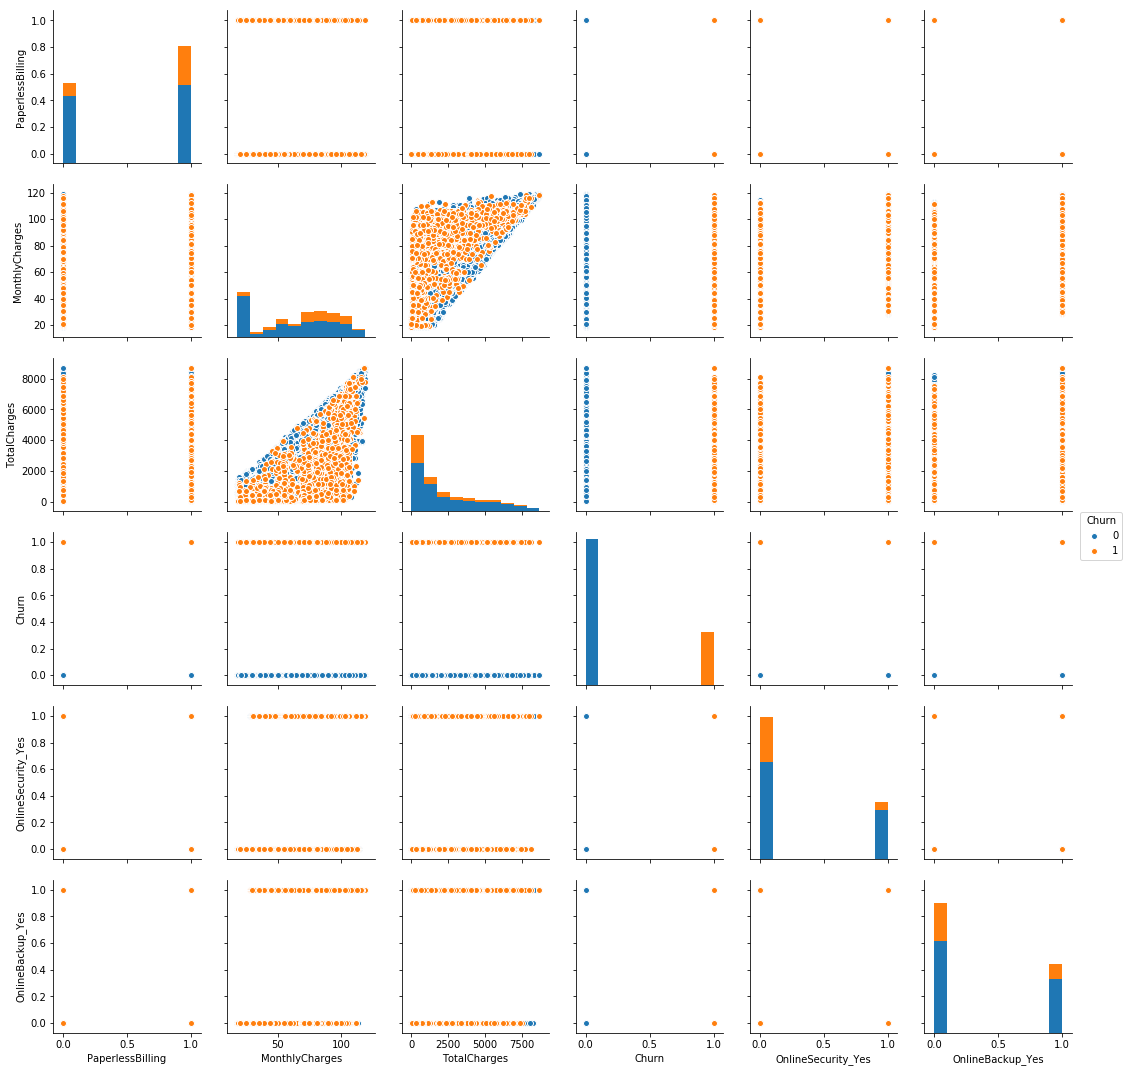

In [130]:
sns.pairplot(dff[['PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes']], hue='Churn')

In [ ]:
# totally different pattern for total charges and monthly charges (I expected the same..Silly Me!)
# customers with higher monthly charges tend to have high churn rate
# rest all can be easily inferred

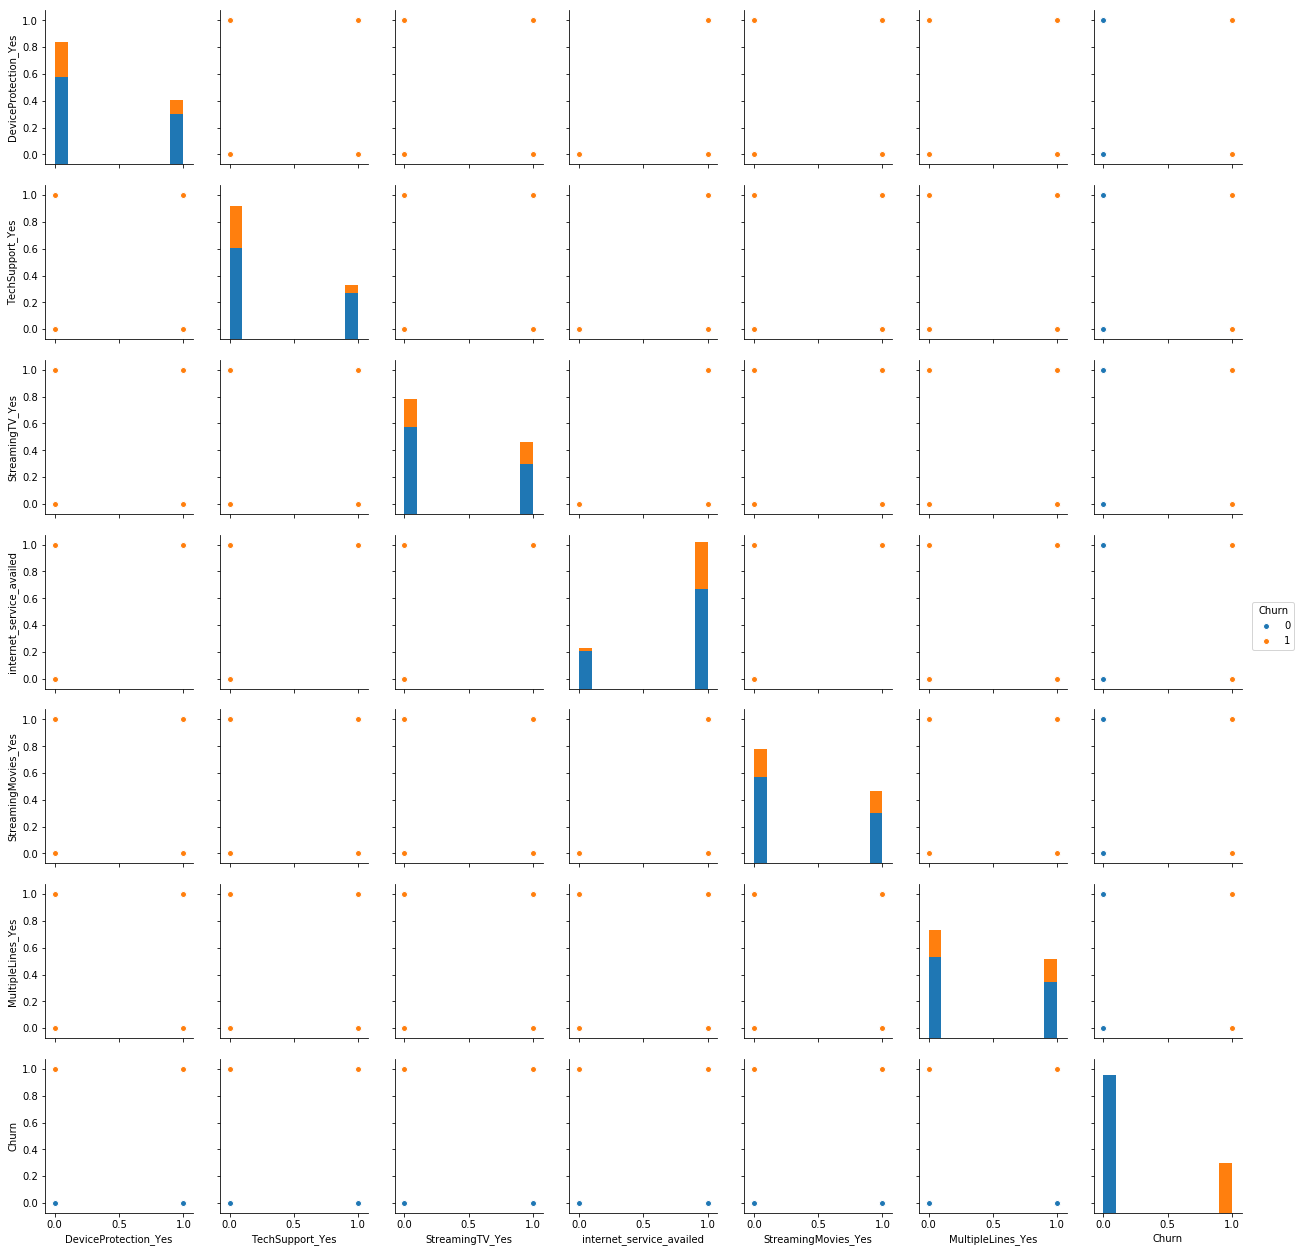

In [132]:
sns.pairplot(dff[['DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'internet_service_availed',
 'StreamingMovies_Yes',
 'MultipleLines_Yes','Churn']], hue='Churn')

In [ ]:
# people with internet service have high churn rate but this can be inferred directly as proportion of non internet user is very low

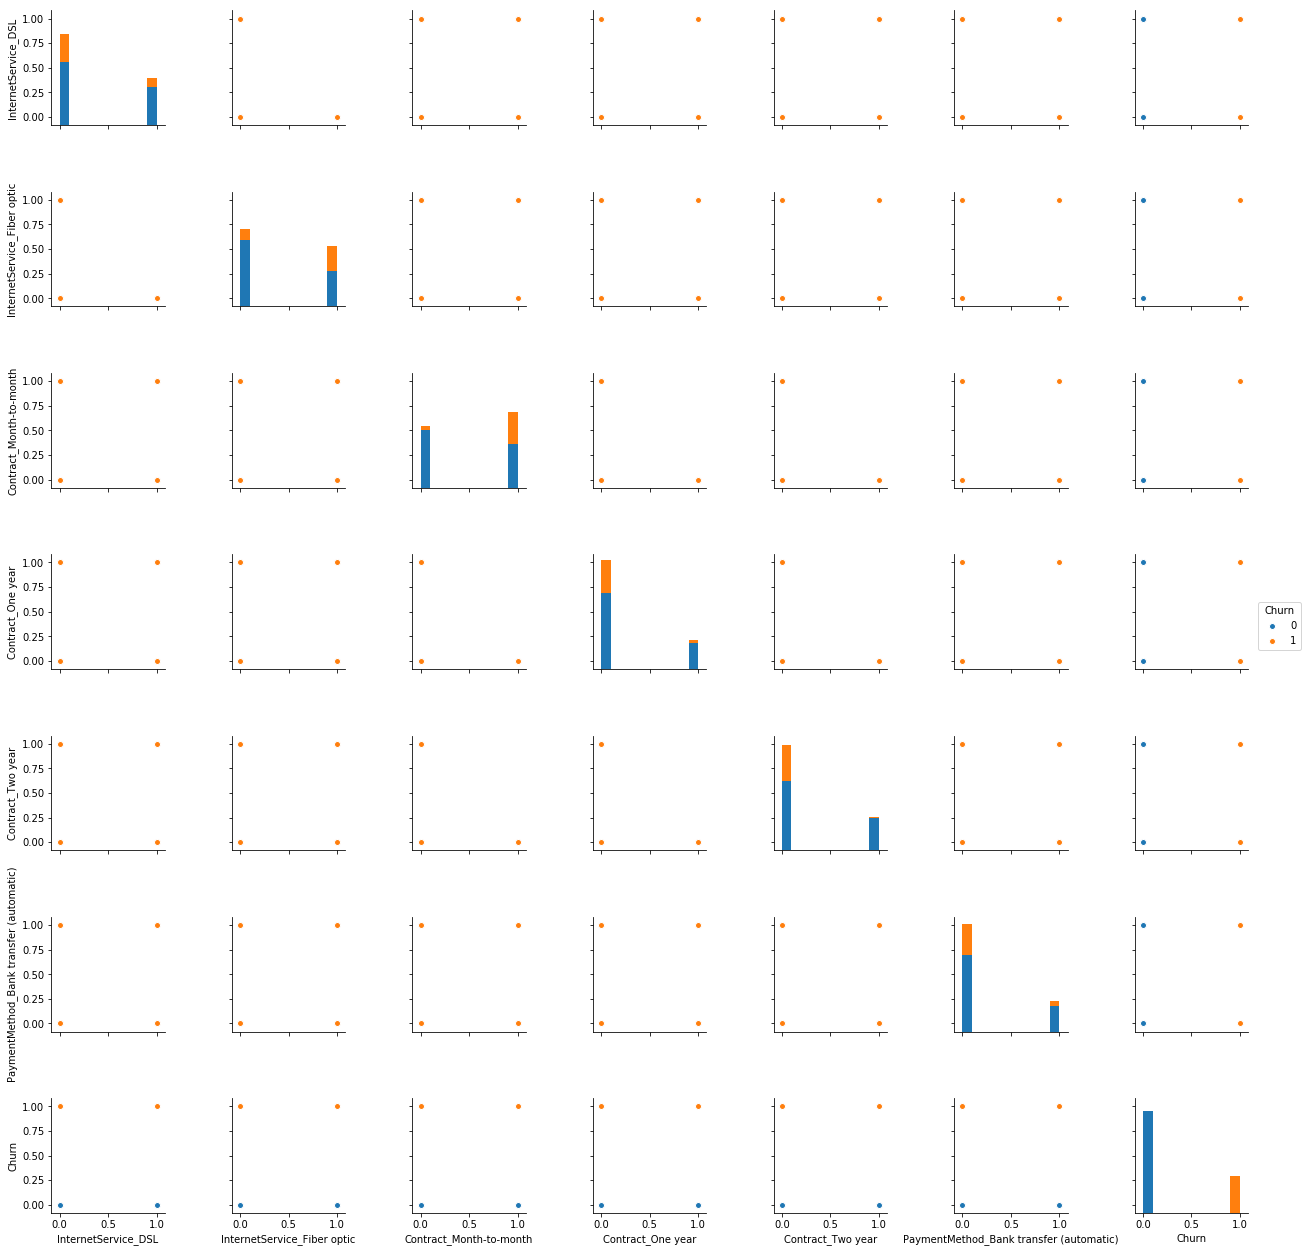

In [133]:
sns.pairplot(dff[['InternetService_DSL',
 'InternetService_Fiber optic',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)','Churn']], hue='Churn')

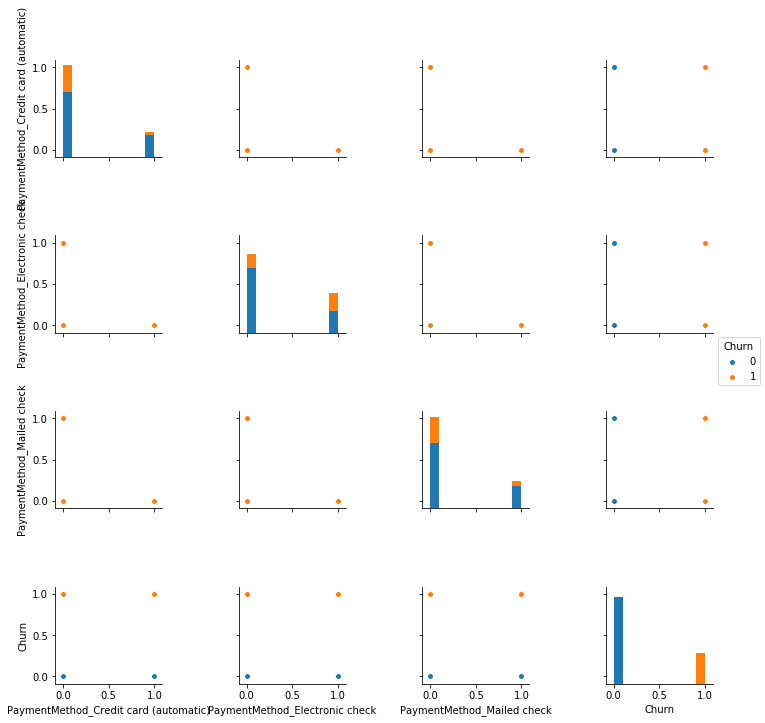

In [135]:
sns.pairplot(dff[['PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check','Churn']], hue='Churn')

In [ ]:
# electronic payment maker have highest churn ratio(intersting!)

In [139]:
cols=['is_male','SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes','StreamingTV_Yes','internet_service_availed','StreamingMovies_Yes','MultipleLines_Yes','InternetService_DSL','InternetService_Fiber optic','Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
X=dff[cols]
Y=dff['Churn']

In [140]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, dff: stats.chi2.sf(chisq, dff)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.413765
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7019
Method:                           MLE   Df Model:                           23
Date:                Tue, 27 Nov 2018   Pseudo R-squ.:                  0.2849
Time:                        19:42:06   Log-Likelihood:                -2914.1
converged:                       True   LL-Null:                       -4075.1
                                        LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
is_male                                    -0.0219

C:\Users\fpalash\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\fpalash\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\fpalash\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\fpalash\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [141]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, Y)

logreg.score(X, Y)
print("Model's predictive score:  " + str(logreg.score(X,Y)))

Model's predictive score:  0.8049126792559989


In [142]:
#we will be splitting our training data set to do cross validation
from sklearn.model_selection import train_test_split
train, test = train_test_split(dff, test_size=0.2)
#re-fit logistic regression on new train sample
cols2=['is_male','SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes','StreamingTV_Yes','internet_service_availed','StreamingMovies_Yes','MultipleLines_Yes','InternetService_DSL','InternetService_Fiber optic','Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
X3=dff[cols]
Y3=dff['Churn']
logit_model3=sm.Logit(Y3,X3)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X3, Y3)
logreg.score(X3, Y3)

0.8049126792559989

In [148]:
from sklearn import metrics
logreg.fit(X3, Y3)

X3_test = test[cols2]
Y3_test = test['Churn']

Y3test_pred = logreg.predict(X3_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X3_test, Y3_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [144]:
# Model's in sample AUC

from sklearn.metrics import roc_auc_score
logreg.fit(X3, Y3)
Y3_pred = logreg.predict(X3)

y_true = Y3
y_scores = Y3_pred
roc_auc_score(y_true, y_scores)

0.7231640670322845

ROC AUC: 0.851


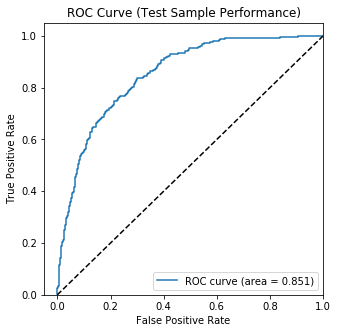

In [150]:
#Visualizing the model's ROC curve (**source for graph code given below the plot)
from sklearn.metrics import roc_curve, auc
logreg.fit(X3, Y3)

y_test = Y3_test
X_test = X3_test
 
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(5,5))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()